In [198]:
!pip install icecream
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from icecream import ic
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Collection & Preprocessing

In [199]:
try:
    credit_df = pd.read_csv('dataset/credit.csv')
    ic('Datasets credit.csv loaded successfully')
except Exception as e:
    ic(f'Error loading dataset: {e}')

ic| 'Datasets credit.csv loaded successfully'


In [200]:
print(f'Shape: {credit_df.shape}')
print(credit_df.info())

Shape: (690, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None

In [201]:
print(credit_df.head())
print('--------------------------------------------------------------------------------')
print(credit_df.tail())

   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560

In [202]:
doublons = credit_df.duplicated().sum()
print(f"Number of duplicates: {doublons} duplicate{'s' if doublons != 1 else ''}.")

Number of duplicates: 0 duplicates.


In [203]:
print("Missing values\n-----------------------")
print((credit_df.isin(['?'])).sum())

Missing values
-----------------------
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [204]:
credit_df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [205]:
print("Number of unique values per column")
print('--------------------------------------------------')
for column in credit_df.columns:
    print(f'{column} : {credit_df[column].nunique()}')

Number of unique values per column
--------------------------------------------------
Gender : 2
Age : 350
Debt : 215
Married : 2
BankCustomer : 2
Industry : 14
Ethnicity : 5
YearsEmployed : 132
PriorDefault : 2
Employed : 2
CreditScore : 23
DriversLicense : 2
Citizen : 3
ZipCode : 170
Income : 240
Approved : 2


In [206]:
categorical_columns_credit = ['Industry', 'Ethnicity', 'Citizen']
for column in categorical_columns_credit:
    print(f'{column} : {credit_df[column].unique()}')
print(f"ZipCode : {credit_df['ZipCode'].unique()}")

Industry : ['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']
Ethnicity : ['White' 'Black' 'Asian' 'Latino' 'Other']
Citizen : ['ByBirth' 'ByOtherMeans' 'Temporary']
ZipCode : [ 202   43  280  100  120  360  164   80  180   52  128  260    0  320
  396   96  200  300  145  500  168  434  583   30  240   70  455  311
  216  491  400  239  160  711  250  520  515  420  980  443  140   94
  368  288  928  188  112  171  268  167   75  152  176  329  212  410
  274  375  408  350  204   40  181  399  440   93   60  395  393   21
   29  102  431  370   24   20  129  510  195  144  380   49   50  381
  150  117   56  211  230  156   22  228  519  253  487  220   88   73
  121  470  136  132  292  154  272  340  108  720  450  232  170 1160
  411  460  348  480  640  372  276  221  352  141  178  600  550 2000
  225  210  110  35

In [207]:
binary_columns_credit = ['Gender', 'Married', 'BankCustomer', 'PriorDefault', 'Employed', 'DriversLicense', 'Approved']

for column in binary_columns_credit:
    print(f'{column} : {credit_df[column].unique()}')

Gender : [1 0]
Married : [1 0]
BankCustomer : [1 0]
PriorDefault : [1 0]
Employed : [1 0]
DriversLicense : [0 1]
Approved : [1 0]


In [208]:
numerical_columns_credit = ['Age','Debt','YearsEmployed','CreditScore', 'Income']
for column in numerical_columns_credit:
    print(f'{column} : {credit_df[column].unique()}')

Age : [30.83 58.67 24.5  27.83 20.17 32.08 33.17 22.92 54.42 42.5  22.08 29.92
 38.25 48.08 45.83 36.67 28.25 23.25 21.83 19.17 25.   47.75 27.42 41.17
 15.83 47.   56.58 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.
 27.75 54.58 34.17 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92
 25.75 26.   37.42 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67
 23.42 20.42 26.67 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67
 34.08 21.67 21.5  49.58 27.67 39.83 28.46 37.17 25.67 34.   49.   62.5
 31.42 52.33 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75
 29.17 24.58 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5
 47.67 22.75 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92
 31.25 56.5  43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 23.08
 32.75 68.67 28.   44.   25.08 32.   60.58 40.83 19.33 41.33 56.   49.83
 22.67 27.   26.08 18.42 21.25 57.08 22.42 48.75 40.   40.58 28.67 33.08
 21.33 41.75 34.5  48.17 27.58 24.08 24.83 36.33 

In [209]:
encoded_df = pd.get_dummies(credit_df, columns=["Industry", "Ethnicity", "Citizen"], drop_first=True)
encoded_df = encoded_df.astype(int)

In [210]:
encoded_df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode',
       'Income', 'Approved', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Black', 'Ethnicity_Latino',
       'Ethnicity_Other', 'Ethnicity_White', 'Citizen_ByOtherMeans',
       'Citizen_Temporary'],
      dtype='object')

In [211]:
encoded_df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,58,4,1,1,3,1,1,6,0,...,0,0,0,0,1,0,0,0,0,0
2,0,24,0,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,27,1,1,1,3,1,1,5,1,...,0,0,0,0,0,0,0,1,0,0
4,1,20,5,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### Exploratory Data Analysis (EDA)

In [212]:
# Compute statistics
for col in numerical_columns_credit:
    mean = credit_df[col].mean()
    median = credit_df[col].median()
    std = credit_df[col].std()
    q1 = credit_df[col].quantile(0.25)
    q3 = credit_df[col].quantile(0.75)
    iqr = q3 - q1
    print(f"--- {col} ---")
    print(f"Mean        : {mean:.2f}")
    print(f"Median      : {median:.2f}")
    print(f"Standard dev: {std:.2f}")
    print(f"IQR         : {iqr:.2f}")
    print()

--- Age ---
Mean        : 31.51
Median      : 28.46
Standard dev: 11.86
IQR         : 15.04

--- Debt ---
Mean        : 4.76
Median      : 2.75
Standard dev: 4.98
IQR         : 6.21

--- YearsEmployed ---
Mean        : 2.22
Median      : 1.00
Standard dev: 3.35
IQR         : 2.46

--- CreditScore ---
Mean        : 2.40
Median      : 0.00
Standard dev: 4.86
IQR         : 3.00

--- Income ---
Mean        : 1017.39
Median      : 5.00
Standard dev: 5210.10
IQR         : 395.50


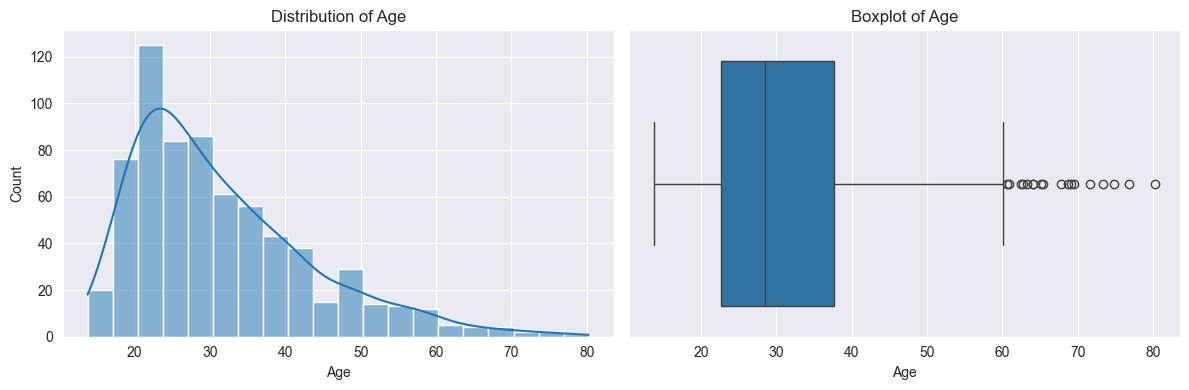

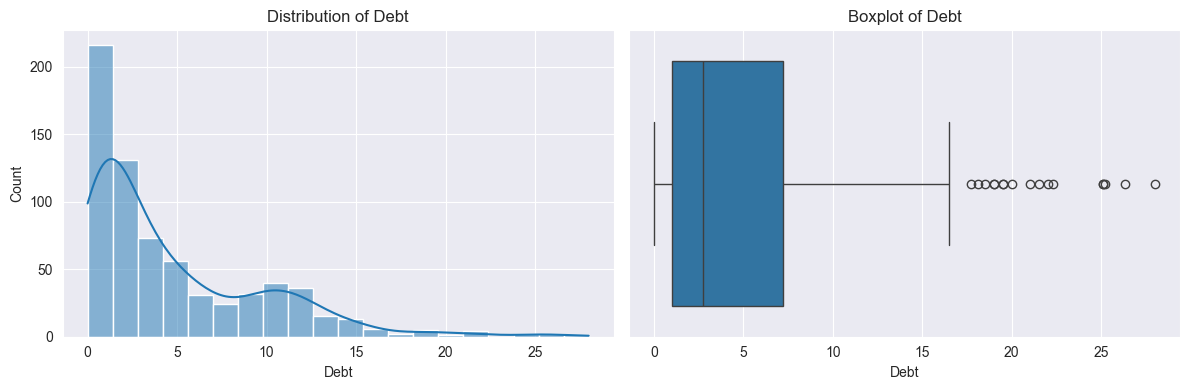

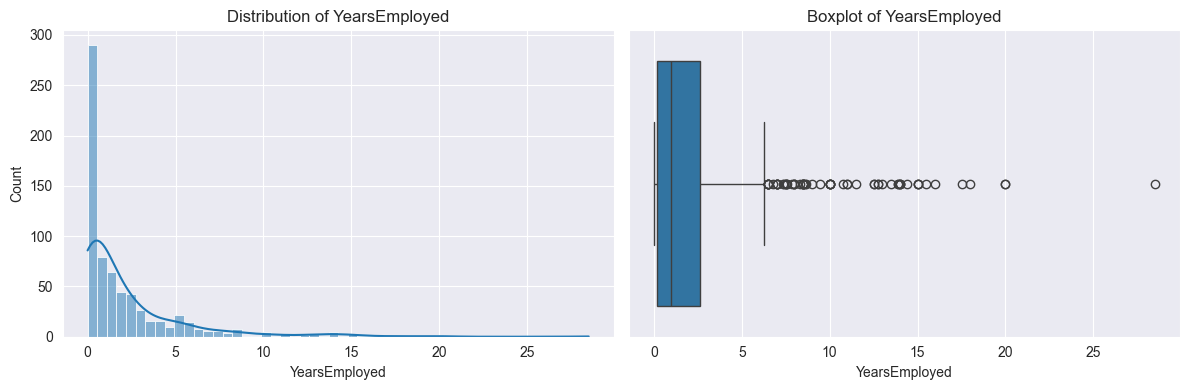

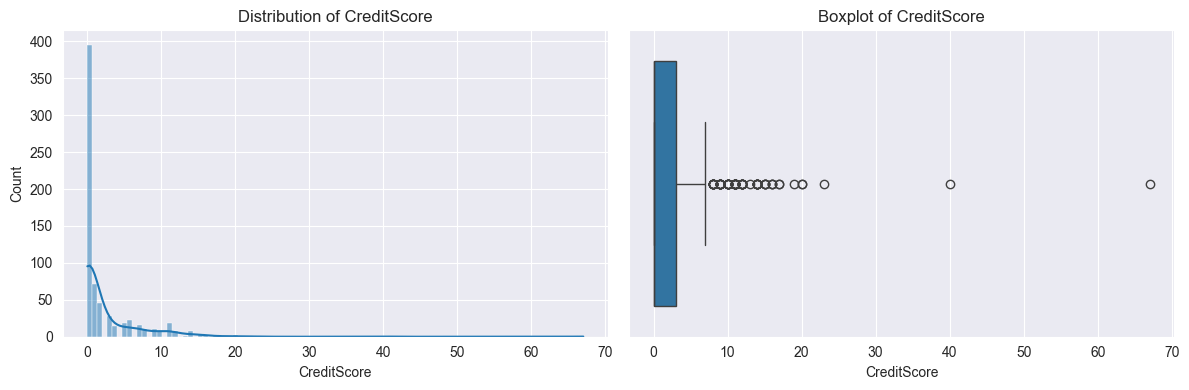

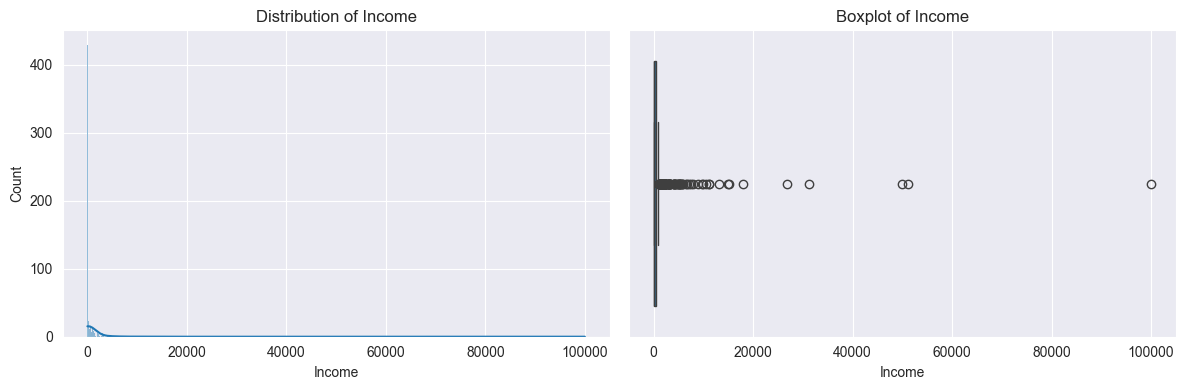

In [213]:
# Display histograms and boxplots
for col in numerical_columns_credit:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram with density curve
    sns.histplot(credit_df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=credit_df[col].dropna(), ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


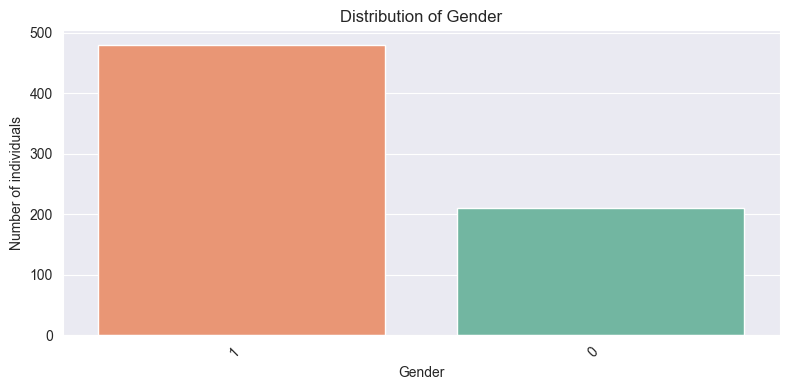

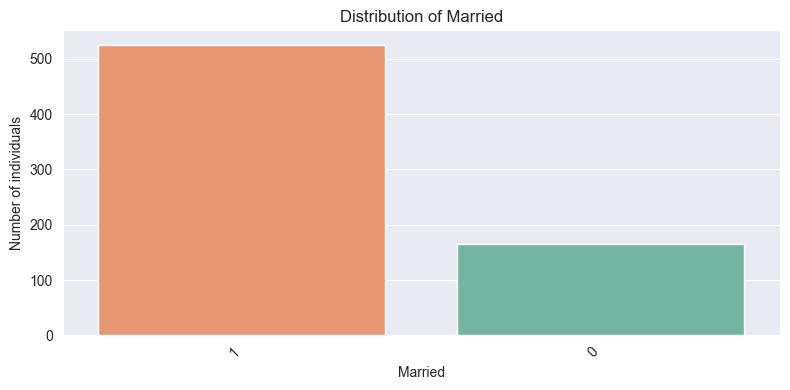

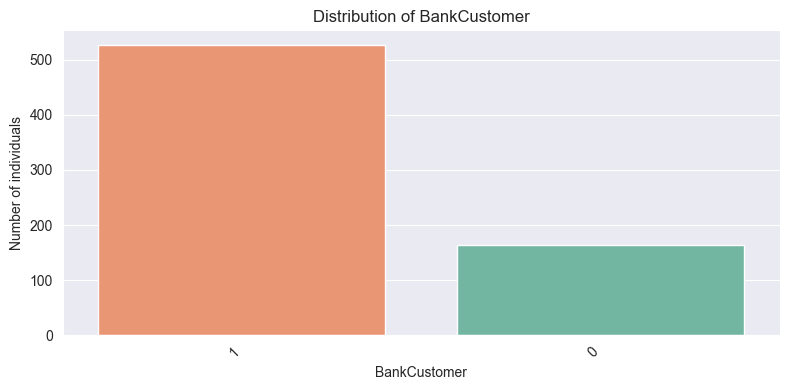

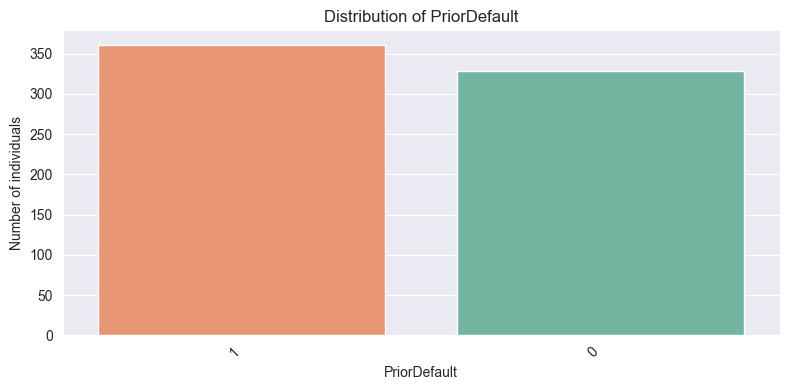

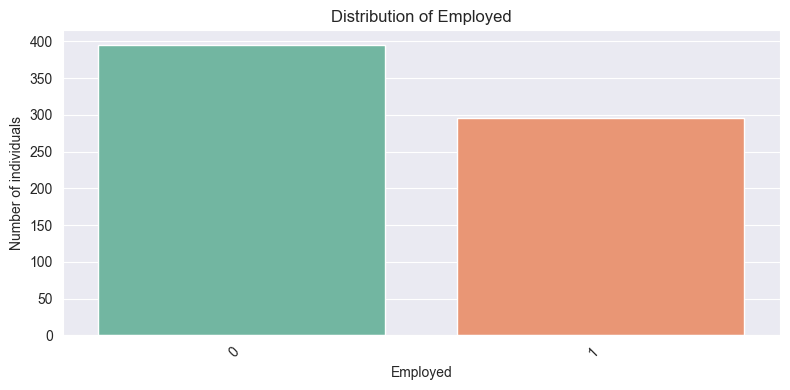

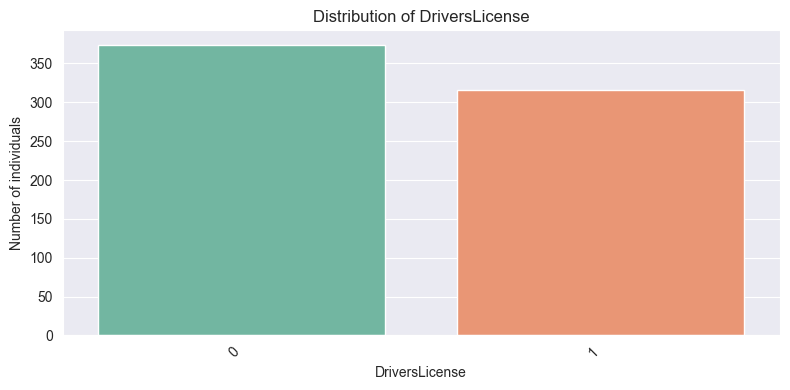

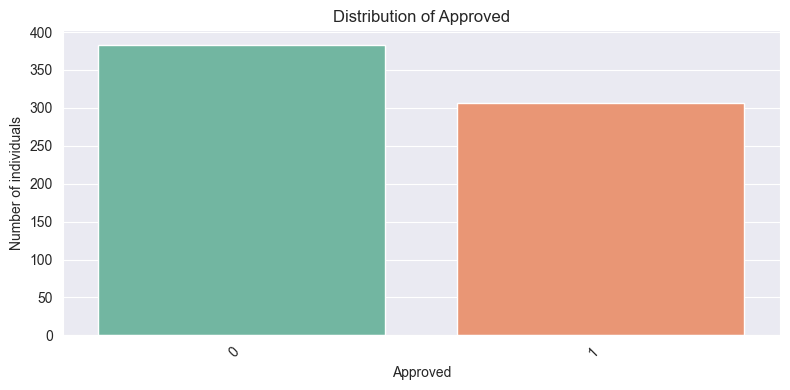

In [214]:
for col in binary_columns_credit:
    # Determine category order by frequency
    order = credit_df[col].value_counts().index

    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=credit_df,
        x=col,
        hue=col,
        order=order,
        palette="Set2",
        legend=False
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of individuals')
    plt.tight_layout()
    plt.show()

In [215]:
for col in binary_columns_credit:
    mode = credit_df[col].mode().iloc[0]
    print(f'The frequency of the mode, {mode}, in column "{col}" is {round(credit_df[credit_df[col] == mode][col].count() / credit_df[col].count() * 100, 2)}%.')


The frequency of the mode, 1, in column "Gender" is 69.57%.
The frequency of the mode, 1, in column "Married" is 76.09%.
The frequency of the mode, 1, in column "BankCustomer" is 76.38%.
The frequency of the mode, 1, in column "PriorDefault" is 52.32%.
The frequency of the mode, 0, in column "Employed" is 57.25%.
The frequency of the mode, 0, in column "DriversLicense" is 54.2%.
The frequency of the mode, 0, in column "Approved" is 55.51%.


In [216]:
mode_income = credit_df['Income'].mode().iloc[0]
frequency = credit_df[credit_df["Income"] == mode_income]["Income"].count() / credit_df["Income"].count() * 100
print(f'The frequency of the mode, {mode_income}, in the "Income" column is {round(frequency, 2)}%.')

The frequency of the mode, 0, in the "Income" column is 42.75%.


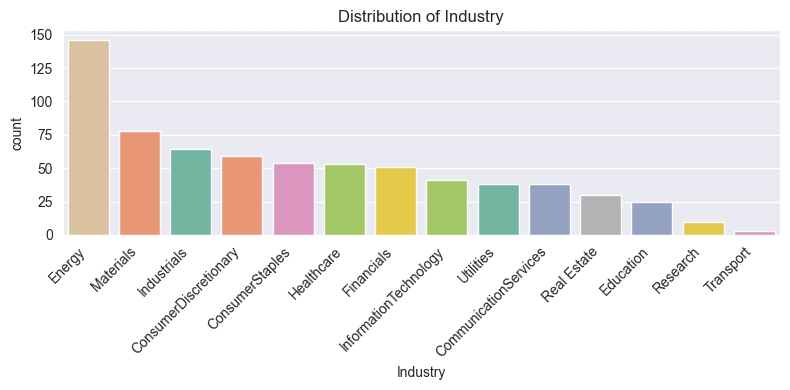

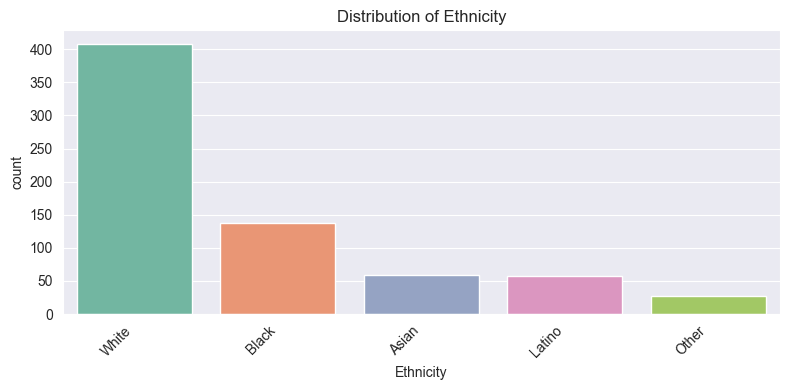

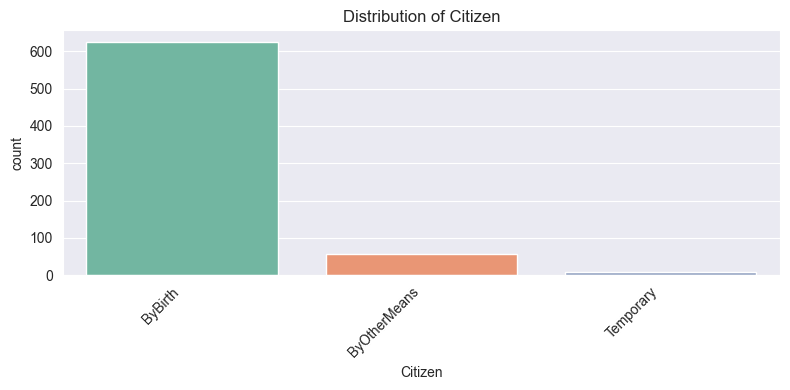

In [217]:
for col in categorical_columns_credit:

    if col != 'ZipCode':
        # Determine category order by frequency
        order = credit_df[col].value_counts().index

        plt.figure(figsize=(8, 4))
        sns.countplot(
            data=credit_df,
            x=col,
            hue=col,            # applies palette without warning
            order=order,        # keeps frequency-based order
            palette="Set2",
            legend=False        # hides unnecessary legend
        )
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


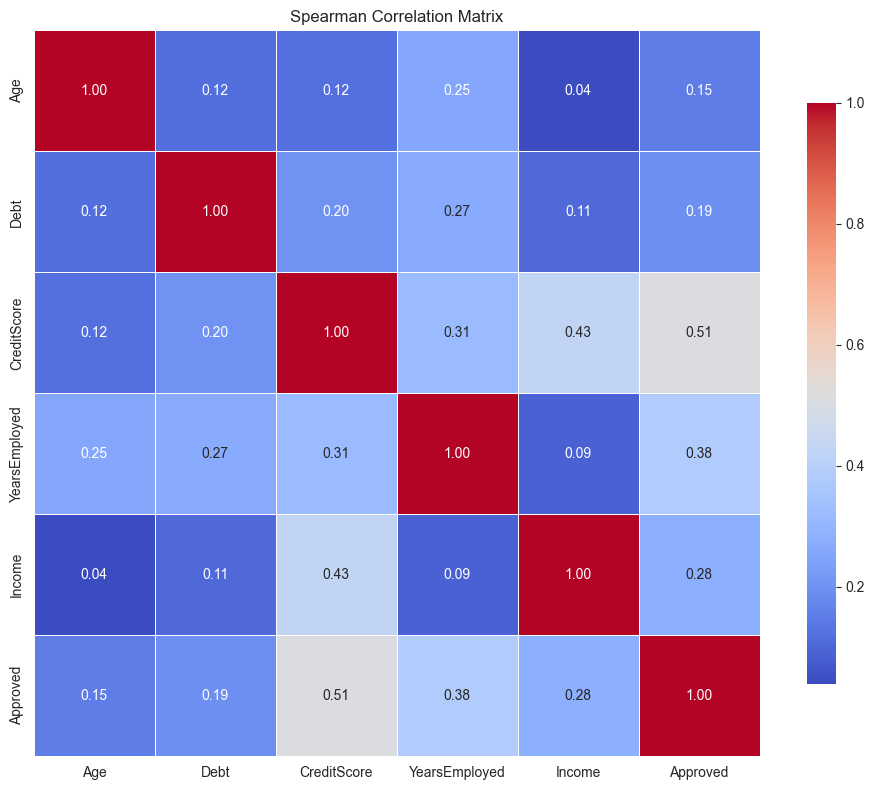

In [218]:
# Spearman correlation matrix
features = ['Age', 'Debt', 'CreditScore', 'YearsEmployed', 'Income']

correlation_spearman = credit_df[features + ['Approved']].corr(method='spearman')

# Display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_spearman,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Spearman Correlation Matrix")
plt.tight_layout()
plt.show()


In [219]:
# List of relevant categorical columns (binary + object types)
crosstab_columns = [
    'Gender', 'Married', 'BankCustomer', 'PriorDefault',
    'Employed', 'DriversLicense', 'Industry', 'Ethnicity', 'Citizen'
]

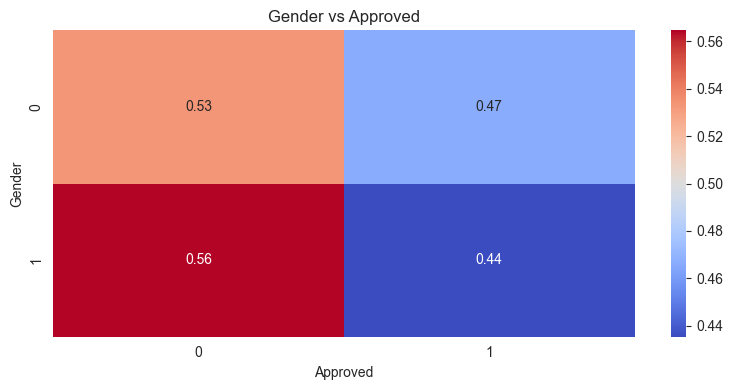

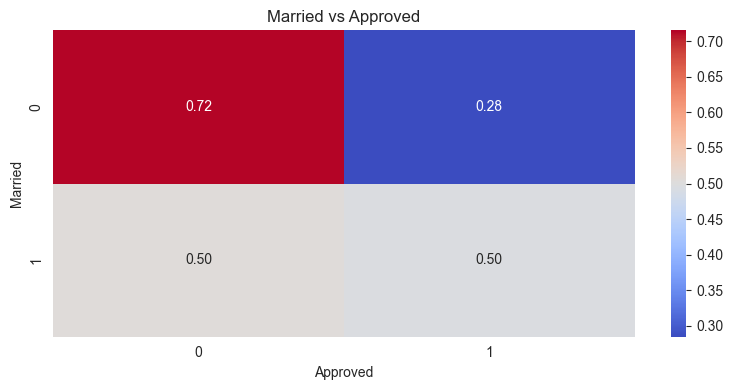

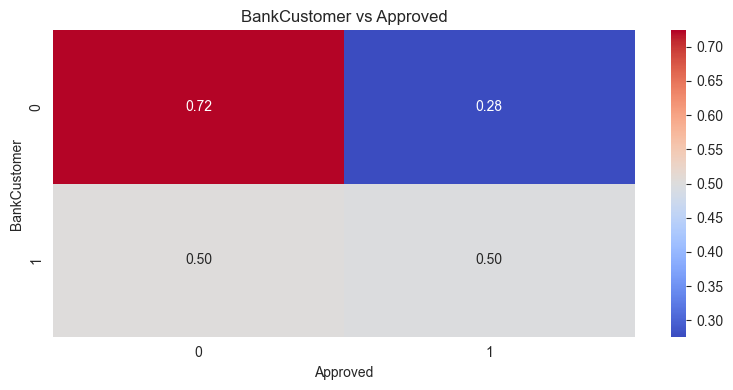

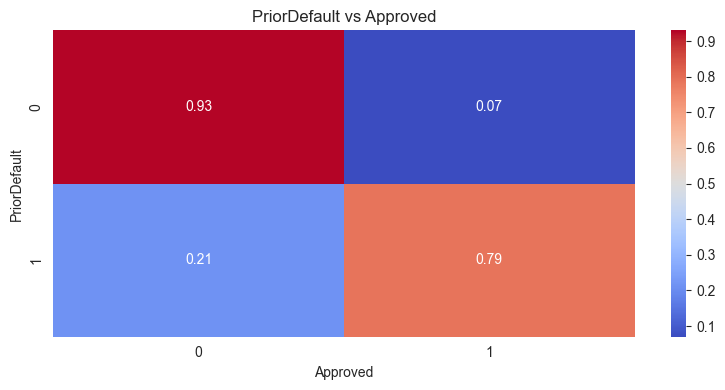

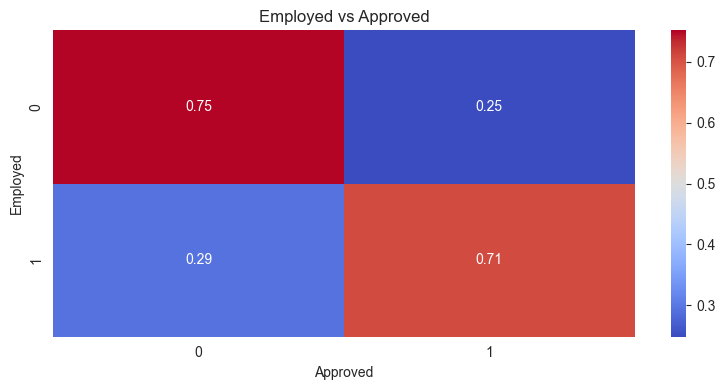

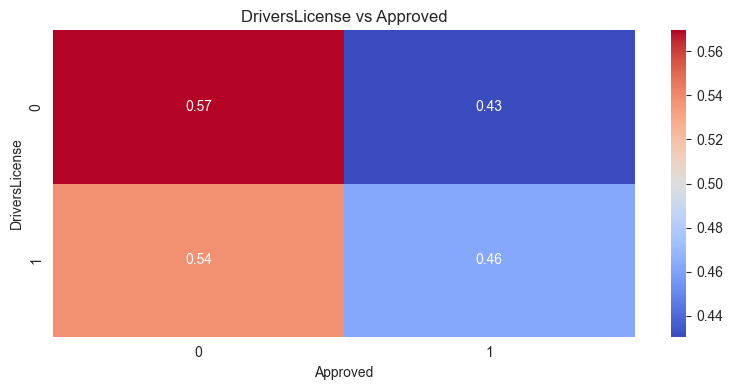

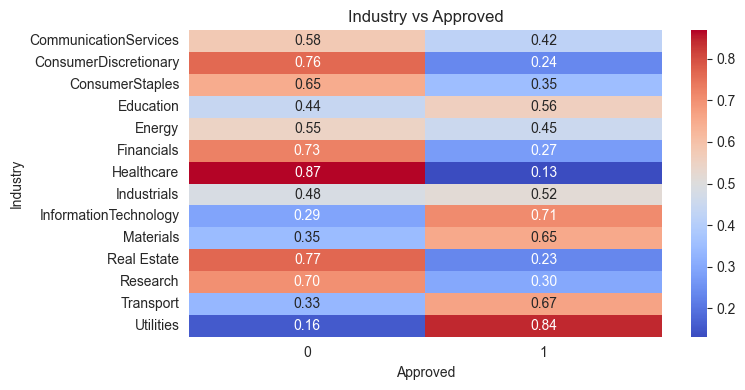

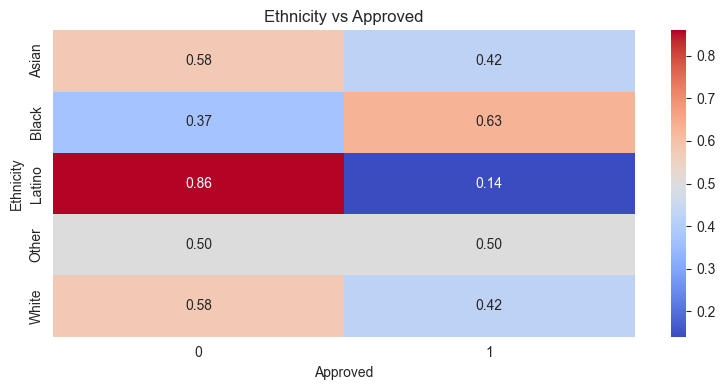

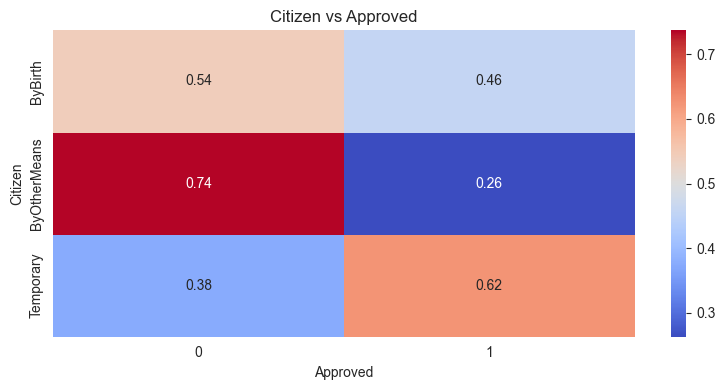

In [220]:
# Loop to generate heatmaps
for col in crosstab_columns:
    cross = pd.crosstab(credit_df[col], credit_df['Approved'])     # Raw cross-tabulation
    cross_percent = cross.div(cross.sum(axis=1), axis=0)           # Row-wise percentages

    plt.figure(figsize=(8, 4))
    sns.heatmap(cross_percent, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"{col} vs Approved")
    plt.xlabel("Approved")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [221]:
for col in categorical_columns_credit:
    if col != 'ZipCode':
        mode = credit_df[col].mode().iloc[0]
        frequency = credit_df[credit_df[col] == mode][col].count() / credit_df[col].count() * 100
        print(f'The frequency of the mode, {mode}, in column "{col}" is {round(frequency, 2)}%.')

The frequency of the mode, Energy, in column "Industry" is 21.16%.
The frequency of the mode, White, in column "Ethnicity" is 59.13%.
The frequency of the mode, ByBirth, in column "Citizen" is 90.58%.


### Class Balancing

In [222]:
# Count the number of occurrences in each class
counts = credit_df['Approved'].value_counts()

print("Target distribution: Approved")
print("------------------------------------")
print("Class 0:", counts[0])
print("Class 1:", counts[1])

Target distribution: Approved
------------------------------------
Class 0: 383
Class 1: 307


In [223]:
# Calculate class ratios
total = counts.sum()
ratio_0 = counts[0] / total  # Ratio of credit applications that were denied (class 0)
ratio_1 = counts[1] / total  # Ratio of credit applications that were approved (class 1)

print("Target ratio: Approved")
print("------------------------------------")
print(f"Class 0 ratio: {ratio_0 * 100:.2f}%.")
print(f"Class 1 ratio: {ratio_1 * 100:.2f}%.")

Target ratio: Approved
------------------------------------
Class 0 ratio: 55.51%.
Class 1 ratio: 44.49%.


In [224]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.decomposition import PCA

# Data preparation
X = encoded_df.drop('Approved', axis=1)  # Drop the target column from X
y = encoded_df['Approved']              # Target variable

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# PCA for visualization (optional)
pca_original = PCA(n_components=2)
X_train_pca = pca_original.fit_transform(X_train)

pca_resampled = PCA(n_components=2)
X_resampled_pca = pca_resampled.fit_transform(X_resampled)

# Display class imbalance before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_resampled))


Before SMOTE: Counter({0: 268, 1: 215})
After SMOTE : Counter({1: 268, 0: 268})


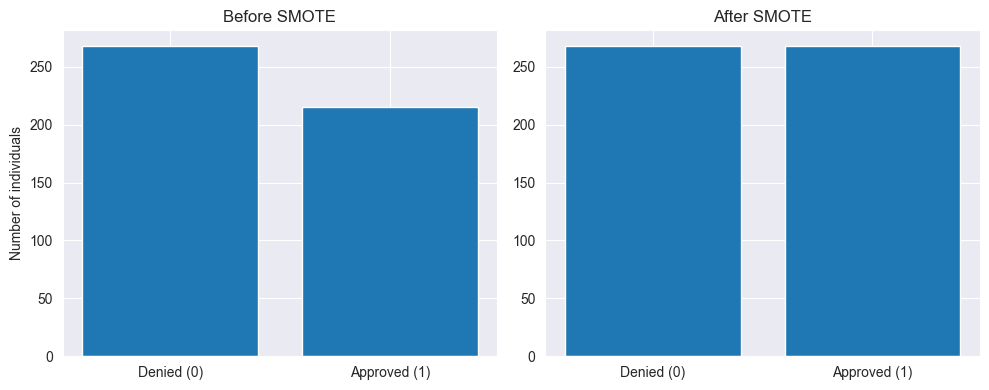

In [225]:
before_counts = Counter(y_train)
after_counts = Counter(y_resampled)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before SMOTE
axes[0].bar(['Denied (0)', 'Approved (1)'], [before_counts[0], before_counts[1]])
axes[0].set_title('Before SMOTE')
axes[0].set_ylabel('Number of individuals')

# After SMOTE
axes[1].bar(['Denied (0)', 'Approved (1)'], [after_counts[0], after_counts[1]])
axes[1].set_title('After SMOTE')

plt.tight_layout()
plt.show()

In [226]:
from imblearn.over_sampling import RandomOverSampler

# Random oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

X_ros_pca = pca_original.fit_transform(X)
X_resampled_ros_pca = pca_resampled.fit_transform(X_ros)

# Display class counts
print("Before:", Counter(y_train))
print("After ROS:", Counter(y_ros))

Before: Counter({0: 268, 1: 215})
After ROS: Counter({1: 268, 0: 268})


In [227]:
from imblearn.under_sampling import RandomUnderSampler

# Random undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

X_rus_pca = pca_original.fit_transform(X)
X_resampled_rus_pca = pca_resampled.fit_transform(X_rus)

print("Before:", Counter(y_train))
print("After RUS:", Counter(y_rus))


Before: Counter({0: 268, 1: 215})
After RUS: Counter({0: 215, 1: 215})


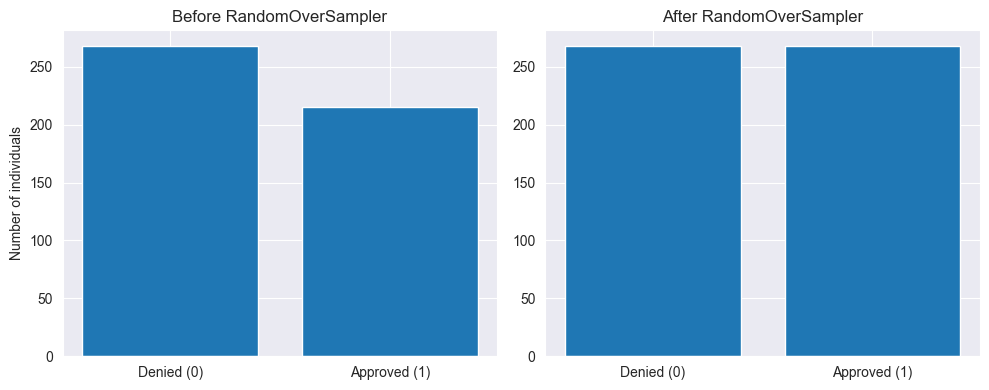

In [228]:
after_counts = Counter(y_ros)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before RandomOverSampler
axes[0].bar(['Denied (0)', 'Approved (1)'], [before_counts[0], before_counts[1]])
axes[0].set_title('Before RandomOverSampler')
axes[0].set_ylabel('Number of individuals')

# After RandomOverSampler
axes[1].bar(['Denied (0)', 'Approved (1)'], [after_counts[0], after_counts[1]])
axes[1].set_title('After RandomOverSampler')

plt.tight_layout()
plt.show()


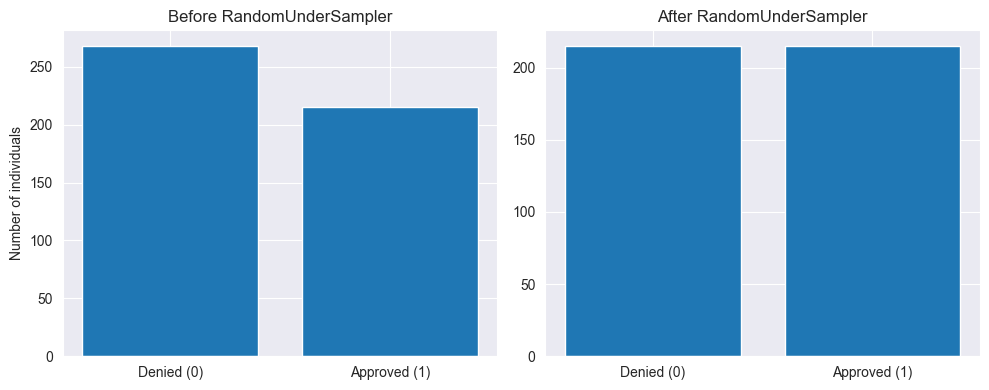

In [229]:
after_counts = Counter(y_rus)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before RandomUnderSampler
axes[0].bar(['Denied (0)', 'Approved (1)'], [before_counts[0], before_counts[1]])
axes[0].set_title('Before RandomUnderSampler')
axes[0].set_ylabel('Number of individuals')

# After RandomUnderSampler
axes[1].bar(['Denied (0)', 'Approved (1)'], [after_counts[0], after_counts[1]])
axes[1].set_title('After RandomUnderSampler')

plt.tight_layout()
plt.show()

#### Supervised Modeling

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Testing Without Class Balancing

The dataset is already fairly balanced, so training is done without applying any class balancing techniques

In [231]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.svm import SVC

# Define a list of models with short labels
models = [
    ('LR', LogisticRegression(solver='newton-cg')),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('RF', RandomForestClassifier()),
    ('GB', GradientBoostingClassifier())
]

# Define a list of evaluation metrics as (name, function) tuples
metrics = [
    ('Accuracy', accuracy_score),
    ('Recall', recall_score),
    ('Precision', precision_score),
    ('F1', f1_score)
]

# Define a list of scalers: Min-Max Scaler and Standard Scaler
scalers = [
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]


In [232]:
X = encoded_df.drop('Approved', axis=1)
y = encoded_df['Approved']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [234]:
for metrics_name, metric in metrics:
  print(f'{metrics_name}\n----------')
  for model_name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_score = metric(y_train, y_train_pred)
    print(f'{model_name} (train) : {round(train_score*100,3)}%')
    y_pred = model.predict(X_test)
    score = metric(y_test, y_pred)
    print(f'{model_name}: {(score*100):5.2f}%')

Accuracy
----------
LR (train) : 88.82%
LR: 83.09%
KNN (train) : 78.882%
KNN: 68.60%
CART (train) : 100.0%
CART: 79.71%
NB (train) : 82.816%
NB: 80.68%
SVM (train) : 66.046%
SVM: 62.32%
RF (train) : 99.793%
RF: 87.44%
GB (train) : 97.101%
GB: 85.02%
Recall
----------
LR (train) : 89.524%
LR: 85.57%
KNN (train) : 65.714%
KNN: 52.58%
CART (train) : 100.0%
CART: 76.29%
NB (train) : 71.429%
NB: 72.16%
SVM (train) : 30.476%
SVM: 25.77%
RF (train) : 100.0%
RF: 85.57%
GB (train) : 96.19%
GB: 84.54%
Precision
----------
LR (train) : 85.455%
LR: 79.81%
KNN (train) : 82.143%
KNN: 72.86%
CART (train) : 100.0%
CART: 80.65%
NB (train) : 86.705%
NB: 84.34%
SVM (train) : 78.049%
SVM: 80.65%
RF (train) : 100.0%
RF: 83.33%
GB (train) : 97.115%
GB: 83.67%
F1
----------
LR (train) : 87.442%
LR: 82.59%
KNN (train) : 73.016%
KNN: 61.08%
CART (train) : 100.0%
CART: 80.21%
NB (train) : 78.329%
NB: 77.78%
SVM (train) : 43.836%
SVM: 39.06%
RF (train) : 100.0%
RF: 85.42%
GB (train) : 96.667%
GB: 83.94%


In [235]:
for actual, pred in zip(y_test, y_pred):
  print(f'Actual: {actual}, Predicted: {pred}')

Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

In [236]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

models = [('LR', LogisticRegression(solver='newton-cg', class_weight='balanced')), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier(class_weight='balanced')), ('NB', GaussianNB()), ('SVM', SVC(class_weight='balanced', probability=True)), ('RF', RandomForestClassifier(class_weight='balanced')), ('GB', GradientBoostingClassifier())]

scoring = {'Accuracy': make_scorer(accuracy_score), 'Recall': make_scorer(recall_score),
           'Precision': make_scorer(precision_score), 'F1': make_scorer(f1_score), 'AUC': 'roc_auc'}

smote_models = ['KNN', 'NB', 'GB']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = [5, 7, 10]
for n in folds:
    print(f"------------------- StratifiedKFold: {n} splits -------------------")
    for model_name, model in models:

        for scaler_name, scaler in scalers:
            steps = []
            if scaler is not None:
                steps.append((scaler_name, scaler))

            if model_name in smote_models:
                steps.append(('smote', SMOTE(random_state=42)))

            steps.append((model_name, model))
            pipe = Pipeline(steps)

            results = cross_validate(
                pipe, X, y,
                cv=cv,
                scoring=scoring,
                return_train_score=True,
                n_jobs=-1
            )

            print(f'\nModel: {model_name:<5}  |  Scaler: {scaler_name}')
            for metric in scoring:
                scores = results[f'test_{metric}']
                print(f'  {metric:9}: {scores.mean()*100:5.2f}%  (±{scores.std()*100:4.2f}%)')
            train_mean = results['train_Accuracy'].mean()
            train_std  = results['train_Accuracy'].std()
            print(f'  Train Acc CV : {train_mean*100:.2f}% (±{train_std*100:.2f}%)')


------------------- StratifiedKFold: 5 splits -------------------

Model: LR     |  Scaler: MinMaxScaler
  Accuracy : 86.23%  (±3.64%)
  Recall   : 90.24%  (±3.40%)
  Precision: 81.34%  (±4.94%)
  F1       : 85.45%  (±3.29%)
  AUC      : 92.68%  (±1.98%)
  Train Acc CV : 87.14% (±0.23%)

Model: LR     |  Scaler: StandardScaler
  Accuracy : 86.67%  (±3.82%)
  Recall   : 90.24%  (±2.67%)
  Precision: 82.00%  (±5.02%)
  F1       : 85.86%  (±3.54%)
  AUC      : 93.27%  (±2.26%)
  Train Acc CV : 88.26% (±0.91%)

Model: KNN    |  Scaler: MinMaxScaler
  Accuracy : 84.35%  (±3.82%)
  Recall   : 84.38%  (±4.11%)
  Precision: 81.29%  (±4.55%)
  F1       : 82.78%  (±4.08%)
  AUC      : 88.88%  (±2.65%)
  Train Acc CV : 88.55% (±1.05%)

Model: KNN    |  Scaler: StandardScaler
  Accuracy : 81.45%  (±2.99%)
  Recall   : 79.80%  (±1.30%)
  Precision: 79.03%  (±4.70%)
  F1       : 79.36%  (±2.77%)
  AUC      : 86.56%  (±1.77%)
  Train Acc CV : 86.92% (±1.17%)

Model: CART   |  Scaler: MinMaxScaler
  A

### Testing With Class Balancing

In [237]:
from sklearn.metrics import roc_auc_score

# Define a list of models with class balancing enabled (where applicable)
models = [
    ('LR', LogisticRegression(solver='newton-cg', class_weight='balanced')),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(class_weight='balanced')),
    ('NB', GaussianNB()),
    ('SVM', SVC(class_weight='balanced')),
    ('RF', RandomForestClassifier(class_weight='balanced')),
    ('GB', GradientBoostingClassifier())
]

# Define a list of evaluation metrics as (name, function) tuples
# Includes Accuracy, Recall, Precision, F1-score, and AUC
metrics = [
    ('Accuracy', accuracy_score),
    ('Recall', recall_score),
    ('Precision', precision_score),
    ('F1', f1_score),
    ('AUC', roc_auc_score)
]

# Define a list of scalers: Min-Max Scaler and Standard Scaler
scalers = [
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]

In [238]:
# Split the dataset into input (features) and output (target)
X = encoded_df.drop('Approved', axis=1)
y = encoded_df['Approved']

In [239]:
# Split the data: 70% training / 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [240]:
# Train and evaluate models for comparison
for metrics_name, metric in metrics:
    print(f'{metrics_name}\n----------')
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = metric(y_test, y_pred)
        print(f'{model_name}: {round(score * 100, 3)}%')

Accuracy
----------
LR: 84.541%
KNN: 68.599%
CART: 80.193%
NB: 80.676%
SVM: 63.285%
RF: 85.507%
GB: 85.024%
Recall
----------
LR: 88.66%
KNN: 52.577%
CART: 79.381%
NB: 72.165%
SVM: 27.835%
RF: 83.505%
GB: 83.505%
Precision
----------
LR: 80.374%
KNN: 72.857%
CART: 77.778%
NB: 84.337%
SVM: 81.818%
RF: 84.946%
GB: 83.673%
F1
----------
LR: 84.314%
KNN: 61.078%
CART: 78.351%
NB: 77.778%
SVM: 41.538%
RF: 84.817%
GB: 84.103%
AUC
----------
LR: 84.784%
KNN: 67.652%
CART: 80.6%
NB: 80.173%
SVM: 61.19%
RF: 86.359%
GB: 84.934%


In [241]:
for actual, pred in zip(y_test, y_pred):
  print(f'Actual: {actual}, Predicted: {pred}')

Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

 # Cross Validation

In [242]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

# Define models (with class_weight='balanced' where applicable)
models = [
    ('LR', LogisticRegression(solver='newton-cg', class_weight='balanced')),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(class_weight='balanced')),
    ('NB', GaussianNB()),
    ('SVM', SVC(class_weight='balanced', probability=True)),
    ('RF', RandomForestClassifier(class_weight='balanced')),
    ('GB', GradientBoostingClassifier())
]

# Define evaluation metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Recall': make_scorer(recall_score),
    'Precision': make_scorer(precision_score),
    'F1': make_scorer(f1_score),
    'AUC': 'roc_auc'
}

# Define scalers
scalers = [
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]

# Optional: models to apply SMOTE to
smote_models = ['LR', 'CART', 'SVM', 'RF', 'GB']

# Cross-validation folds to test
folds = [5, 7, 10]

# Evaluate models using different k-folds
for n in folds:
    print(f"\n------------------- StratifiedKFold: {n} splits -------------------\n")
    cv = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)

    for model_name, model in models:
        for scaler_name, scaler in scalers:
            steps = []
            if scaler is not None:
                steps.append((scaler_name, scaler))

            if model_name in smote_models:
                steps.append(('smote', SMOTE(random_state=42)))

            steps.append((model_name, model))
            pipe = Pipeline(steps)

            results = cross_validate(
                pipe,
                X,
                y,
                cv=cv,
                scoring=scoring,
                return_train_score=False,
                n_jobs=-1
            )

            print(f'\nModel: {model_name:<5}  |  Scaler: {scaler_name}')
            for metric in scoring:
                scores = results[f'test_{metric}']
                print(f'  {metric:9}: {scores.mean() * 100:5.2f}%  (±{scores.std() * 100:4.2f}%)')



------------------- StratifiedKFold: 5 splits -------------------


Model: LR     |  Scaler: MinMaxScaler
  Accuracy : 86.52%  (±4.04%)
  Recall   : 90.89%  (±3.32%)
  Precision: 81.43%  (±5.20%)
  F1       : 85.81%  (±3.75%)
  AUC      : 92.62%  (±2.08%)

Model: LR     |  Scaler: StandardScaler
  Accuracy : 85.94%  (±3.80%)
  Recall   : 88.93%  (±2.37%)
  Precision: 81.56%  (±5.17%)
  F1       : 85.02%  (±3.53%)
  AUC      : 93.23%  (±2.35%)

Model: KNN    |  Scaler: MinMaxScaler
  Accuracy : 85.36%  (±2.77%)
  Recall   : 82.09%  (±5.04%)
  Precision: 84.66%  (±3.11%)
  F1       : 83.27%  (±3.25%)
  AUC      : 88.91%  (±2.95%)

Model: KNN    |  Scaler: StandardScaler
  Accuracy : 81.30%  (±3.05%)
  Recall   : 74.92%  (±3.77%)
  Precision: 81.66%  (±3.95%)
  F1       : 78.11%  (±3.43%)
  AUC      : 86.31%  (±1.56%)

Model: CART   |  Scaler: MinMaxScaler
  Accuracy : 80.58%  (±1.86%)
  Recall   : 77.85%  (±4.18%)
  Precision: 78.66%  (±3.50%)
  F1       : 78.10%  (±1.83%)
  AUC      : 

### Test Evaluation

In [243]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline  # <- Use imblearn's Pipeline to include SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd

# 1) Data Preparation
X = encoded_df.drop('Approved', axis=1)
y = encoded_df['Approved']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 2) List of models to evaluate
models = [
    ('Logistic Regression',  LogisticRegression(solver='newton-cg', class_weight='balanced')),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced')),
    ('Naive Bayes',  GaussianNB()),
    ('SVM', SVC(class_weight='balanced', probability=True)),
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# 3) Training / Prediction / Evaluation
results = []
for name, model in models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('smote',  SMOTE(random_state=42)),
        ('clf',    model)
    ])
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    results.append({
        'Model':     name,
        'Accuracy':  f"{accuracy_score(y_test, y_pred)*100:.2f}%",
        'Recall':    f"{recall_score(y_test, y_pred)*100:.2f}%",
        'Precision': f"{precision_score(y_test, y_pred)*100:.2f}%",
        'F1':        f"{f1_score(y_test, y_pred)*100:.2f}%",
        'AUC ROC':   f"{roc_auc_score(y_test, y_proba)*100:.2f}%"
    })

# 4) Display results
print(pd.DataFrame(results))

                 Model Accuracy  Recall Precision      F1 AUC ROC
0  Logistic Regression   86.96%  89.13%    82.83%  85.86%  95.35%
1                  KNN   79.23%  69.57%    81.01%  74.85%  88.00%
2        Decision Tree   82.13%  82.61%    78.35%  80.42%  82.17%
3          Naive Bayes   82.61%  70.65%    87.84%  78.31%  90.12%
4                  SVM   88.41%  92.39%    83.33%  87.63%  94.92%
5        Random Forest   89.86%  85.87%    90.80%  88.27%  95.74%
6    Gradient Boosting   89.37%  91.30%    85.71%  88.42%  96.05%
